# Projeto 1 - Ciência dos Dados #

**Matheus Amaral Ricardo**

**Pergunta**: O Protocolo de Kyoto foi criado visando a diminuição de gases estufa. Os países que estão dentro deste emitem mais gás carbônico que os que não estão no acordo? O PIB dos países reflete na emissão deste gás?

**Hipótese**: Países que emitiam maiores níveis de gás carbônico eram os mais ricos (com maior PIB per capita), logo assinaram o Protocolo de Kyoto visando a diminuição da emissão do gás. Ao longo dos anos os países dentro do protocolo diminuiriam sua emissão de gases estufa, enquanto os outros manteriam ou até aumentariam.
https://revistas.pucsp.br/index.php/rpe/article/viewFile/11774/8496

**Base de dados utilizada**:
https://data.worldbank.org/indicator/NY.GDP.PCAP.KD
https://cdiac.ess-dive.lbl.gov/

**Importações**

In [173]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Leitura dos arquivos em Excel**

In [174]:
co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
pib = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')

**Gráfico da emissão de CO2 por pessoa (em toneladas) por ano e a média**

Text(0, 0.5, 'CO2 emissions (tones per person)')

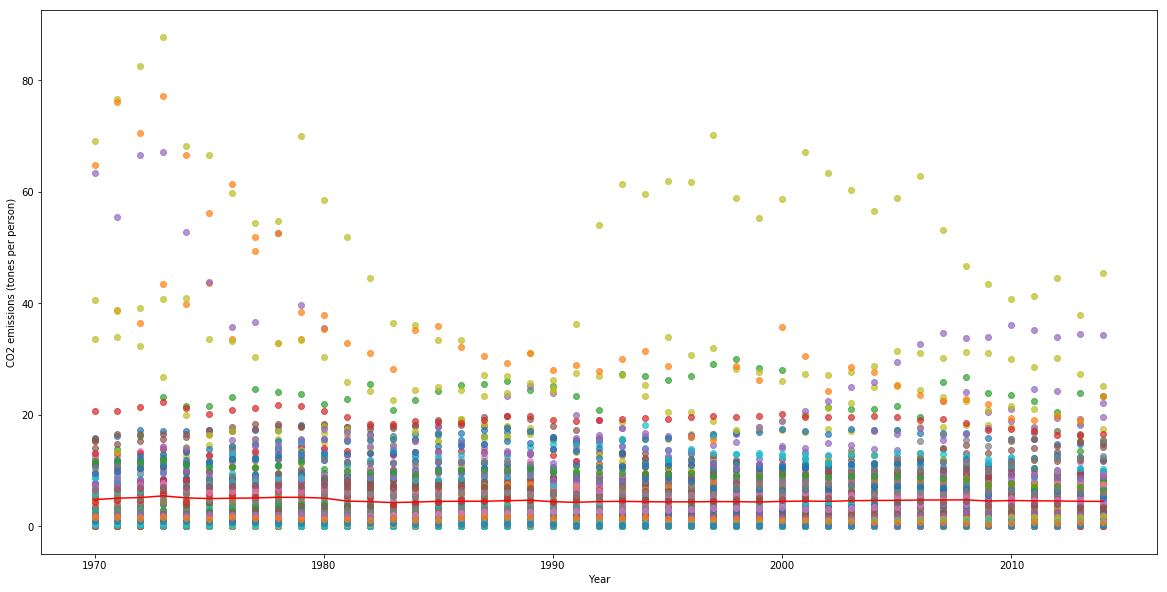

In [175]:
CO2 = co2.set_index("country")
CO2.columns
CO2_datas = [1970,1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,1989, 1990, 1991, 1992, 1993, 1994, 1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
CO2_anos = CO2.loc[:, CO2_datas]
CO2_anos_t = CO2_anos.T
medias_CO2 = CO2_anos.mean()
plt.figure(figsize=(20,10))
for pais in CO2_anos_t.columns:
    plt.scatter(x=CO2_anos_t.index, y=CO2_anos_t[pais],alpha=0.7)
plt.plot(medias_CO2.index,  medias_CO2, color="r")
plt.xlabel("Year")
plt.ylabel("CO2 emissions (tones per person)")

**Selecionando o ano 2000 para análise**

In [176]:
co2_00 = co2.loc[:, ["country", 2000]]
pib_00 = pib.loc[:, ["country", 2000]]

Trocando o índice das tabelas

In [177]:
co2_index = co2_00.set_index("country")
pib_index = pib_00.set_index("country")

Removendo países sem dados

In [178]:
co2_nan = co2_index.dropna()
pib_nan = pib_index.dropna()

Juntando as duas tabelas

In [179]:
co2_pib = co2_nan.join(pib_nan, how="inner", lsuffix="_CO2", rsuffix="_PIB")
co2_pib.columns = ['2000 CO2 Emissions (tones per person)', '2000 GDP per capita']

Mostrando na tabela os países que assinaram o Protocolo de Kyoto

In [180]:
kyoto = ['Antigua and Barbuda','Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Chile','China','Costa Rica','Croatia','Cuba','Czech Republic','Denmark','Ecuador','Egypt','El Salvador','Estonia','Fiji','Finland','France','Germany','Greece','Guatemala','Honduras','Indonesia','Ireland','Israel','Italy','Japan','Kazakhstan','South Korea','Latvia','Lithuania','Luxembourg','Malaysia','Maldives','Mali','Malta','Marshall Islands','Mexico','Micronesia, Fed. Sts.','Netherlands','New Zealand','Nicaragua','Niger','Norway','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Romania','Russia','St. Lucia','St. Vincent and the Grenadines','Samoa','Seychelles','Slovak Republic','Slovenia','Solomon Islands','Spain','Sweden','Switzerland','Thailand','Trinidad and Tobago','Turkmenistan','Tuvalu','Ukraine','United Kingdom','Uruguay','Uzbekistan','Vietnam','Zambia']
co2_pib.loc[:, "Kyoto Protocol"] = 'não'
co2_pib.loc[kyoto, "Kyoto Protocol"] = 'sim'

Tabela final separada por assinantes e não assinantes do protocolo

In [181]:
co2_pib.sort_values('Kyoto Protocol', inplace = True)
co2_pib.head()

,2000 CO2 Emissions (tones per person),2000 GDP per capita,Kyoto Protocol
country,,,
Albania,0.9680,2340.0,não
Mozambique,0.0747,257.0,não
Morocco,1.1800,1970.0,não
Montenegro,2.8400,4950.0,não
Mongolia,3.1300,1600.0,não


Tabela final ordenada pelas emissões de gás carbônico

In [182]:
co2_pib.sort_values('2000 CO2 Emissions (tones per person)', inplace = True)
co2_pib.head()

,2000 CO2 Emissions (tones per person),2000 GDP per capita,Kyoto Protocol
country,,,
"Congo, Dem. Rep.",0.0173,290.0,não
Chad,0.0211,463.0,não
Burundi,0.0424,228.0,não
Ethiopia,0.0534,197.0,não
Uganda,0.0595,412.0,não


**Histogramas da emissão de CO2 em 2000 (separados por países assinantes e não assinantes)**

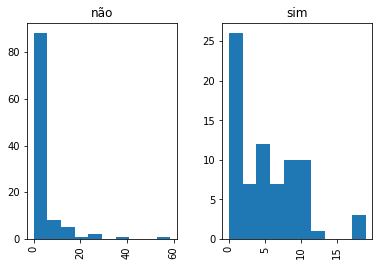

In [183]:
co2_pib.hist(column="2000 CO2 Emissions (tones per person)", by="Kyoto Protocol");

Com estes histogramas podemos verificar que em ambos à assimetria à direita, logo a ocorrência de países com baixa emissão de CO2 é maior em ambos, porém nos países não assinantes esta assimetria é bem mais nítida.

**Boxplots da emissão de CO2 em 2000 (separados por países assinantes e não assinantes)**

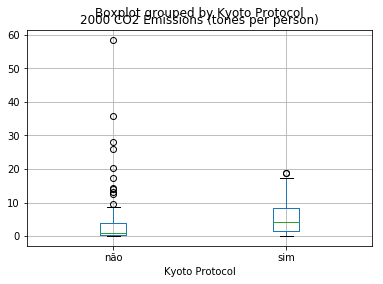

In [184]:
co2_pib.boxplot(column="2000 CO2 Emissions (tones per person)", by="Kyoto Protocol")

**Gráficos para o ano 2000**

Começando pelo gráfico PIB per capita x emissões de CO2 para todos os países e sua correlação.

Taxa de correlação:
0.6895169227026363


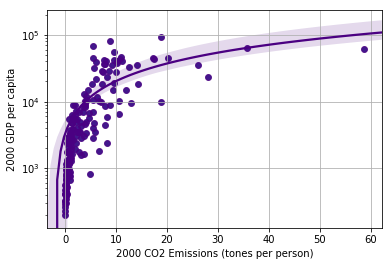

In [185]:
co2_pib.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', logy=True)
sns.regplot(co2_pib['2000 CO2 Emissions (tones per person)'],co2_pib['2000 GDP per capita'], color=('indigo'))
plt.grid()
correlacao = co2_pib['2000 CO2 Emissions (tones per person)'].corr(co2_pib['2000 GDP per capita'])
print('Taxa de correlação:')
print(correlacao)

Gráfico PIB per capita x emissões de CO2 para os países que assinaram o protocolo e sua correlação.

Taxa de correlação:


0.6644652183316472

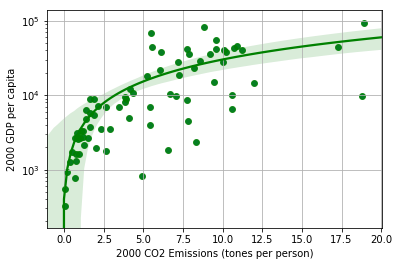

In [186]:
sim = co2_pib.loc[kyoto,:]
sim.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', logy=True)
sns.regplot(sim['2000 CO2 Emissions (tones per person)'],sim['2000 GDP per capita'], color=('green'))
plt.grid()

print('Taxa de correlação:')
sim['2000 CO2 Emissions (tones per person)'].corr(sim['2000 GDP per capita'])

Os países com menor PIB per capita emitem menos gás carbônico que países com PIB per capita maior, de modo que no topo das duas tabelas finais se encontram países, em sua maioria, fora do protocolo e com PIB per capita e emissão de gás carbônico baixa, enquanto no final delas, ocorre o oposto. Portanto, países que assinaram o protocolo emitiam mais CO2 e tinham PIB per capita maior.

Gráfico PIB per capita x emissões de CO2 para os países que não assinaram o protocolo e sua correlação.

Taxa de correlação:


0.6895169227026363

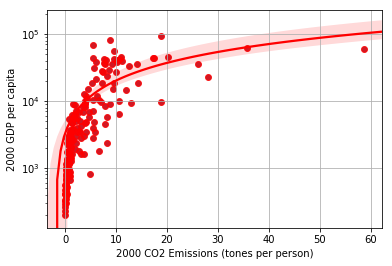

In [187]:
co2_pib.loc[:, "Kyoto Protocol"] = 'não'
nao = co2_pib
nao.plot.scatter(x='2000 CO2 Emissions (tones per person)',y='2000 GDP per capita', logy=True)
sns.regplot(nao['2000 CO2 Emissions (tones per person)'],nao['2000 GDP per capita'], color=('red'))
plt.grid()

print('Taxa de correlação:')
nao['2000 CO2 Emissions (tones per person)'].corr(nao['2000 GDP per capita'])

Gráfico de dispersão comparando os países que assinaram e não assinaram o protocolo.

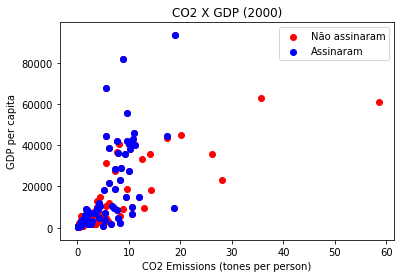

In [188]:
plt.scatter(nao['2000 CO2 Emissions (tones per person)'], nao['2000 GDP per capita'], color='r', label="Não assinaram")
plt.scatter(sim['2000 CO2 Emissions (tones per person)'],sim['2000 GDP per capita'], color='b', label= "Assinaram")
plt.xlabel("CO2 Emissions (tones per person)")
plt.ylabel("GDP per capita")
plt.legend()
plt.title("CO2 X GDP (2000)")
plt.show()

Adicionando retas ao gráfico de dispersão.

Coeficiente linear: 453.1427071613307
Coeficiente angular: 2978.9469421942918
Coeficiente linear: 3306.2587455731327
Coeficiente angular: 1694.4975671924933


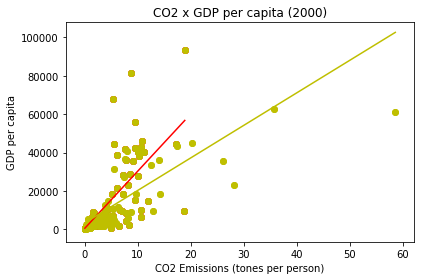

In [189]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('CO2 x GDP per capita (2000)')
    plt.xlabel('CO2 Emissions (tones per person)')
    plt.ylabel('GDP per capita')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
plt.scatter(sim['2000 CO2 Emissions (tones per person)'], sim['2000 GDP per capita'], color='r', label="Assinaram")
reta(sim['2000 CO2 Emissions (tones per person)'], sim['2000 GDP per capita'],'r')
plt.scatter(nao['2000 CO2 Emissions (tones per person)'], nao['2000 GDP per capita'], color='y', label="Não assinaram")
reta(nao['2000 CO2 Emissions (tones per person)'], nao['2000 GDP per capita'],'y')


**Efetuando o mesmo processo para o ano de 2007**

In [190]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
pib = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')

#Dados de 20
co2_07 = co2.loc[:, ["country", 2007]]
pib_07 = pib.loc[:, ["country", 2007]]

#Trocando o índice das tabelas
co2_index = co2_07.set_index("country")
pib_index = pib_07.set_index("country")

#Removendo países sem dados
co2_nan = co2_index.dropna()
pib_nan = pib_index.dropna()

#Juntando as duas tabelas
co2_pib = co2_nan.join(pib_nan, how="inner", lsuffix="_CO2", rsuffix="_PIB")
co2_pib.columns = ['2007 CO2 Emissions (tones per person)', '2007 GDP per capita']

#Mostrando na tabela os países que assinaram o Protocolo de Kyoto
co2_pib.loc[:, "Kyoto Protocol"] = 'não'
co2_pib.loc[kyoto, "Kyoto Protocol"] = 'sim'

**Histogramas da emissão de CO2 em 2007 (separados por países assinantes e não assinantes)**

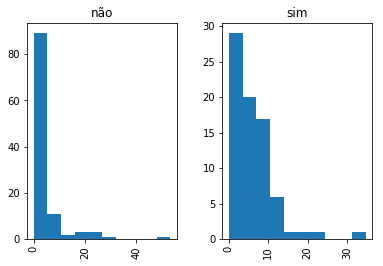

In [191]:
co2_pib.hist(column="2007 CO2 Emissions (tones per person)", by="Kyoto Protocol");

**Boxplots da emissão de CO2 em 2007 (separados por países assinantes e não assinantes)**

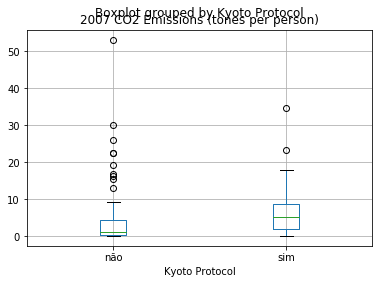

In [192]:
co2_pib.boxplot(column="2007 CO2 Emissions (tones per person)", by="Kyoto Protocol")

**Gráficos para o ano 2007**

Gráfico PIB per capita x emissões de CO2 para todos os países e sua correlação.

Taxa de correlação:


0.6494183474914059

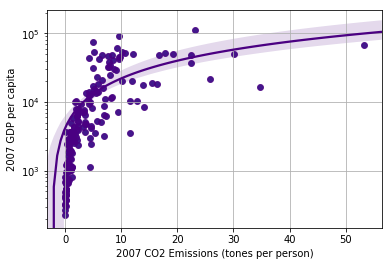

In [193]:
co2_pib.plot.scatter(x='2007 CO2 Emissions (tones per person)',y='2007 GDP per capita', logy=True)
sns.regplot(co2_pib['2007 CO2 Emissions (tones per person)'],co2_pib['2007 GDP per capita'], color=('indigo'))
plt.grid()
print('Taxa de correlação:')
co2_pib['2007 CO2 Emissions (tones per person)'].corr(co2_pib['2007 GDP per capita'])

Gráfico PIB per capita x emissões de CO2 para os países que assinaram o protocolo e sua correlação.

Taxa de correlação:


0.549605781795617

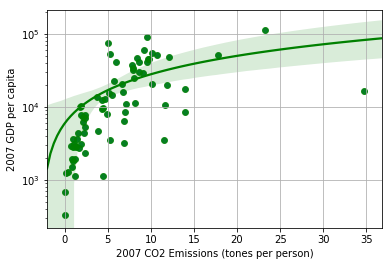

In [194]:
sim = co2_pib.loc[kyoto,:]
sim.plot.scatter(x='2007 CO2 Emissions (tones per person)',y='2007 GDP per capita', logy=True)
sns.regplot(sim['2007 CO2 Emissions (tones per person)'],sim['2007 GDP per capita'], color=('green'))
plt.grid()
print('Taxa de correlação:')
sim['2007 CO2 Emissions (tones per person)'].corr(sim['2007 GDP per capita'])

Gráfico PIB per capita x emissões de CO2 para os países que não assinaram o protocolo e sua correlação.

Taxa de correlação:


0.6494183474914059

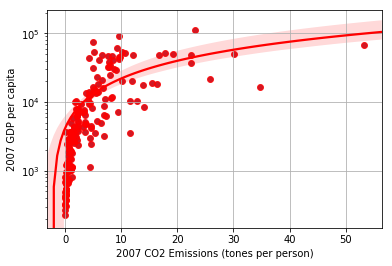

In [195]:
co2_pib.loc[:, "Kyoto Protocol"] = 'não'
nao = co2_pib
nao.plot.scatter(x='2007 CO2 Emissions (tones per person)',y='2007 GDP per capita', logy=True)
sns.regplot(nao['2007 CO2 Emissions (tones per person)'],nao['2007 GDP per capita'], color=('red'))
plt.grid()
print('Taxa de correlação:')

nao['2007 CO2 Emissions (tones per person)'].corr(nao['2007 GDP per capita'])

Gráfico de dispersão comparando os países que assinaram e não assinaram o protocolo.

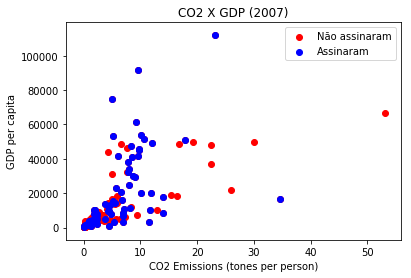

In [196]:
plt.scatter(nao['2007 CO2 Emissions (tones per person)'], nao['2007 GDP per capita'], color='r', label="Não assinaram")
plt.scatter(sim['2007 CO2 Emissions (tones per person)'],sim['2007 GDP per capita'], color='b', label= "Assinaram")
plt.xlabel("CO2 Emissions (tones per person)")
plt.ylabel("GDP per capita")
plt.legend()
plt.title("CO2 X GDP (2007)")
plt.show()

Adicionando retas ao gráfico de dispersão.

Coeficiente linear: 5997.278613007602
Coeficiente angular: 2211.154368823198
Coeficiente linear: 4165.313493282369
Coeficiente angular: 1785.2703782709873


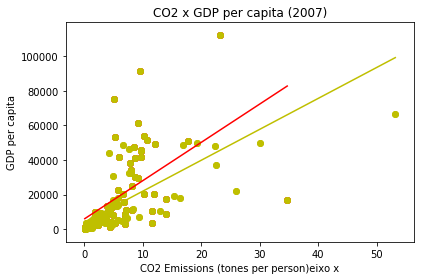

In [197]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('CO2 x GDP per capita (2007)')
    plt.xlabel('CO2 Emissions (tones per person)eixo x')
    plt.ylabel('GDP per capita')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
plt.scatter(sim['2007 CO2 Emissions (tones per person)'], sim['2007 GDP per capita'], color='r', label="Assinaram")
reta(sim['2007 CO2 Emissions (tones per person)'], sim['2007 GDP per capita'],'r')
plt.scatter(nao['2007 CO2 Emissions (tones per person)'], nao['2007 GDP per capita'], color='y', label="Não assinaram")
reta(nao['2007 CO2 Emissions (tones per person)'], nao['2007 GDP per capita'],'y')

**Efetuando o mesmo processo para o ano de 2014**

In [198]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
pib = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')

#Dados de 20
co2_14 = co2.loc[:, ["country", 2014]]
pib_14 = pib.loc[:, ["country", 2014]]

#Trocando o índice das tabelas
co2_index = co2_14.set_index("country")
pib_index = pib_14.set_index("country")

#Removendo países sem dados
co2_nan = co2_index.dropna()
pib_nan = pib_index.dropna()

#Juntando as duas tabelas
co2_pib = co2_nan.join(pib_nan, how="inner", lsuffix="_CO2", rsuffix="_PIB")
co2_pib.columns = ['2014 CO2 Emissions (tones per person)', '2014 GDP per capita']

#Mostrando na tabela os países que assinaram o Protocolo de Kyoto
co2_pib.loc[:, "Kyoto Protocol"] = 'não'
co2_pib.loc[kyoto, "Kyoto Protocol"] = 'sim'

**Histogramas da emissão de CO2 em 2014 (separados por países assinantes e não assinantes)**

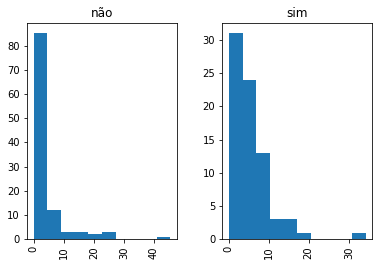

In [199]:
co2_pib.hist(column="2014 CO2 Emissions (tones per person)", by="Kyoto Protocol");

**Boxplots da emissão de CO2 em 2014 (separados por países assinantes e não assinantes)**

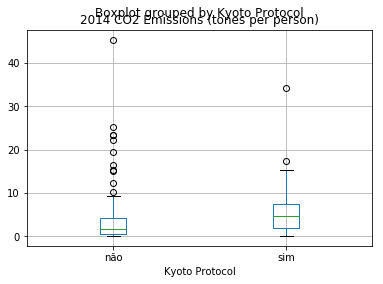

In [200]:
co2_pib.boxplot(column="2014 CO2 Emissions (tones per person)", by="Kyoto Protocol")

Gráfico PIB per capita x emissões de CO2 para todos os países e sua correlação.

Taxa de correlação:


0.594080145783105

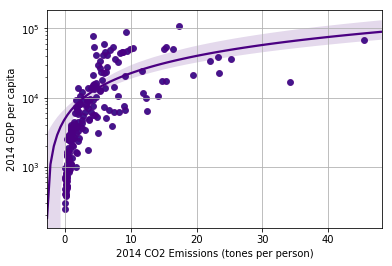

In [201]:
co2_pib.plot.scatter(x='2014 CO2 Emissions (tones per person)',y='2014 GDP per capita', logy=True)
sns.regplot(co2_pib['2014 CO2 Emissions (tones per person)'],co2_pib['2014 GDP per capita'], color=('indigo'))
plt.grid()
print('Taxa de correlação:')
co2_pib['2014 CO2 Emissions (tones per person)'].corr(co2_pib['2014 GDP per capita'])

Gráfico PIB per capita x emissões de CO2 para os países que assinaram o protocolo e sua correlação.

Taxa de correlação:


0.4463882434195381

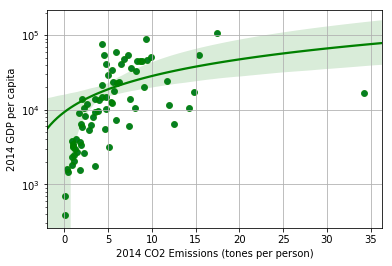

In [202]:
sim = co2_pib.loc[kyoto,:]
sim.plot.scatter(x='2014 CO2 Emissions (tones per person)',y='2014 GDP per capita', logy=True)
sns.regplot(sim['2014 CO2 Emissions (tones per person)'],sim['2014 GDP per capita'], color=('green'))
plt.grid()
print('Taxa de correlação:')
sim['2014 CO2 Emissions (tones per person)'].corr(sim['2014 GDP per capita'])

Gráfico PIB per capita x emissões de CO2 para os países que não assinaram o protocolo e sua correlação.

Taxa de correlação:


0.594080145783105

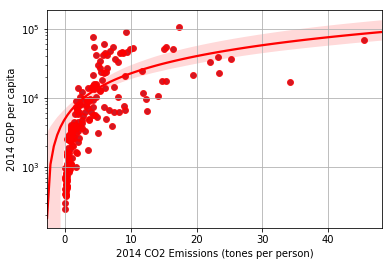

In [203]:
co2_pib.loc[:, "Kyoto Protocol"] = 'não'
nao = co2_pib
nao.plot.scatter(x='2014 CO2 Emissions (tones per person)',y='2014 GDP per capita', logy=True)
sns.regplot(nao['2014 CO2 Emissions (tones per person)'],nao['2014 GDP per capita'], color=('red'))
plt.grid()
print('Taxa de correlação:')
nao['2014 CO2 Emissions (tones per person)'].corr(nao['2014 GDP per capita'])

Gráfico de dispersão comparando os países que assinaram e não assinaram o protocolo.

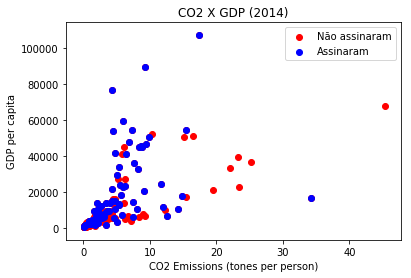

In [204]:
plt.scatter(nao['2014 CO2 Emissions (tones per person)'], nao['2014 GDP per capita'], color='r', label="Não assinaram")
plt.scatter(sim['2014 CO2 Emissions (tones per person)'],sim['2014 GDP per capita'], color='b', label= "Assinaram")
plt.xlabel("CO2 Emissions (tones per person)")
plt.ylabel("GDP per capita")
plt.legend()
plt.title("CO2 X GDP (2014)")
plt.show()

Adicionando retas ao gráfico de dispersão.

Coeficiente linear: 9344.377761552176
Coeficiente angular: 1900.2377139194216
Coeficiente linear: 4932.192513323259
Coeficiente angular: 1749.4549591357438


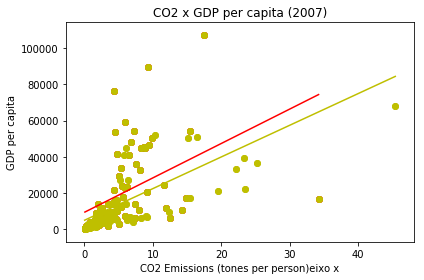

In [206]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('CO2 x GDP per capita (2007)')
    plt.xlabel('CO2 Emissions (tones per person)eixo x')
    plt.ylabel('GDP per capita')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()
    
plt.scatter(sim['2014 CO2 Emissions (tones per person)'], sim['2014 GDP per capita'], color='r', label="Assinaram")
reta(sim['2014 CO2 Emissions (tones per person)'], sim['2014 GDP per capita'],'r')
plt.scatter(nao['2014 CO2 Emissions (tones per person)'], nao['2014 GDP per capita'], color='y', label="Não assinaram")
reta(nao['2014 CO2 Emissions (tones per person)'], nao['2014 GDP per capita'],'y')

**Conclusão**